<H3>PROJECT PROPOSAL</H3>

<h2> Relationship Between Gender & Mean Age of Football Olympic Athletes</h2>
<h6>Group 06 :  Alejandro Solano <b>Romero</b>, Apram <b>Ahuja</b>, Aron <b>Bahram</b> , Ruhani <b>Kaur</b> </h6>

<h3>👋 INTRODUCTION</h3>

The aim of this project is to analyze the historical data of Olympic athletes and their performance in various events. The data source for this project is the Kaggle dataset <a href = "https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results">120 years of Olympic history: athletes and results</a>, which was obtained from the <a href = " https://www.sports-reference.com/">Sports Reference</a>.

The dataset consists of 271116 records, each representing an individual athlete who participated in an Olympic event. The dataset has 15 attributes, ```ID```, `Name`, `Sex`, `Age`, `Height`, `Weight`, `Team`, `NOC`, `Games`, `Year`, `Season`, `City`, `Sport`, `Event` & `Medal`. The dataset covers the period from 1896 to 2016 and includes both summer and winter Olympics.

<h5>Research Question</h5>
<hr/>
We'll be investigating the question <b>whether gender has any effect on the mean age of Olympic athletes in Football from the year 1900 onwards.</b>

Our parameter of interest would be the difference of mean age in male and female football olympic athletes from 1900 onwards. As well as, the scale parameter that is useful in answering this question would be the standard deviation of age in male and female olympic athletes.

We were interested in this research question as, a previous study shows negative relationship between age and athletes performance in olympics. One study states that the declines in performance were more in females, but another study has found that delayed maturation has been observed in higher-skilled football athletes and differences within the sport in the relative age effect.


<h2>🧑‍💻 PRELIMENARY RESULTS</h2>

We downloaded the dataset from : 
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 

It was then saved in the ```data/``` in our main github repository

We installed & loaded all the libraries that we might need to pre-process and visualise the dataset.

<h5>Install packages on R kernel</h5>

Run once to install packages before loading them on the notebook

In [1]:
install.packages('cowplot')
install.packages("devtools")
devtools::install_github("UBC-MDS/datateachr")
library(datateachr)
library(tidyverse)
devtools::install_github("UBC-MDS/taxyvr", build_vignettes = TRUE)
library(taxyvr)
install.packages('infer', dependencies = TRUE)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Skipping install of 'datateachr' from a github remote, the SHA1 (78d391f4) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Skipping install of 'taxyvr' from a github remote, the SHA1 (227a8d8f) has not changed since last install.
  Use `force

<h5>Loading necessary libraries</h5>

In [2]:
library(cowplot)
library(datateachr)
library(dplyr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 6)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




<H3>Dataset</H3>

In [3]:
data <- read_csv("data/athlete_events.csv")
head(data)
spec(data)

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


cols(
  ID = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  Team = col_character(),
  NOC = col_character(),
  Games = col_character(),
  Year = col_double(),
  Season = col_character(),
  City = col_character(),
  Sport = col_character(),
  Event = col_character(),
  Medal = col_character()
)

<h5> Cleaning and Wrangling into a tidy format</h5>
<hr/>
For our inferential study, we would look at data from year 1900 & on. As well as, we are accessing who won medals in the Olympics in the event Football Men's/Women's Football. 

1. We'll first filter our data to select only these columns and remove all the dataset with `NA` age values.
2. Now, we'll impute the `NA` medal values with `No` specifying that they didn't won any medal. We won't be removing the examples with `NA` Medal values as it would lead to poor inference by removing the data of athletes who participated in Olympics but didn't win any medal.

In [4]:
football_data <- data %>% 
                        filter(Year >= 1900) %>%
                        filter(!is.na(Age)) %>%
                        filter(Sport == "Football" & (Event == "Football Men's Football" | Event == "Football Women's Football")) %>%
                        select(Sex , Age, Medal) 
head(football_data)
dim(football_data)
sum(is.na(football_data))

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,24,NA
F,23,Bronze
M,28,NA
M,26,NA
M,22,Gold
M,22,NA


[1] 6370    3

[1] 4839

In [5]:
football_data$Medal[is.na(football_data$Medal)]<- "No"
head(football_data)
nrow(football_data)
sum(is.na(football_data))

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,24,No
F,23,Bronze
M,28,No
M,26,No
M,22,Gold
M,22,No


[1] 6370

[1] 0

<h5>Sample From the Population of Male/Female Olympic Football Athletes</h5>

Just like in actual world scenario, we take only one sample without replacement from population. Since, our population size is $6370$, taking a sample size which ~10% is better for inference i.e., sample size of $n = 600$, would be ideal for our research question.

In [6]:
set.seed(1234) #for better reproducibility

football_sample <- football_data %>%
                  sample_n(size = 600)

head(football_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,22,Bronze
F,21,Bronze
M,24,Gold
M,26,No
M,34,No
M,20,No


In [7]:
summary(football_sample$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   21.00   23.00   23.45   26.00   38.00 

<h4> 📈 Plotting Relevant Data</h4>

As we're interested in the difference in mean age for male and female football olympic athletes and their standard deviations i.e., we can look at the histograms of the age distribution for each gender. Additionally, box plot would be great to learn about the spread between these two classes.

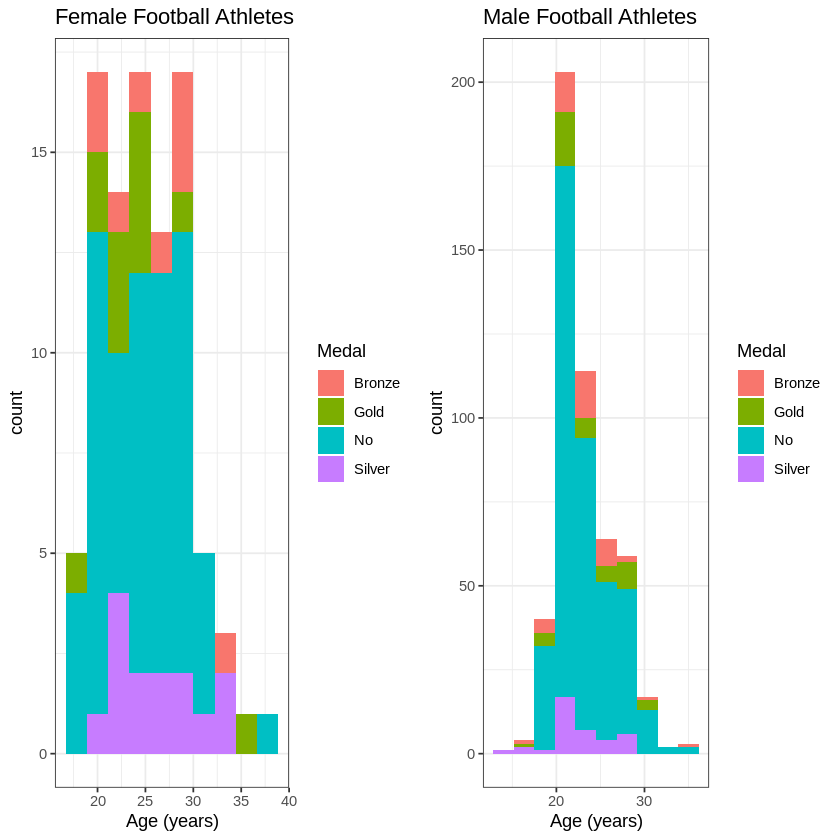

In [8]:
# filtering sample for female athletes and ploting the age distribution
female_age_plot <- football_sample %>%
    filter(Sex == 'F') %>%
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Female Football Athletes",
         x = "Age (years)") +
    theme_bw()

# filtering sample for male athletes and ploting the age distribution
male_age_plot <- football_sample %>%
    filter(Sex == 'M') %>%
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Male Football Athletes",
         x = "Age (years)") +
    theme_bw()

# comparing the distribution plots between the two genders
age_comparison <- plot_grid(female_age_plot, male_age_plot, rel_widths = c(1, 1), rel_heights = c(1, 1))
age_comparison

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


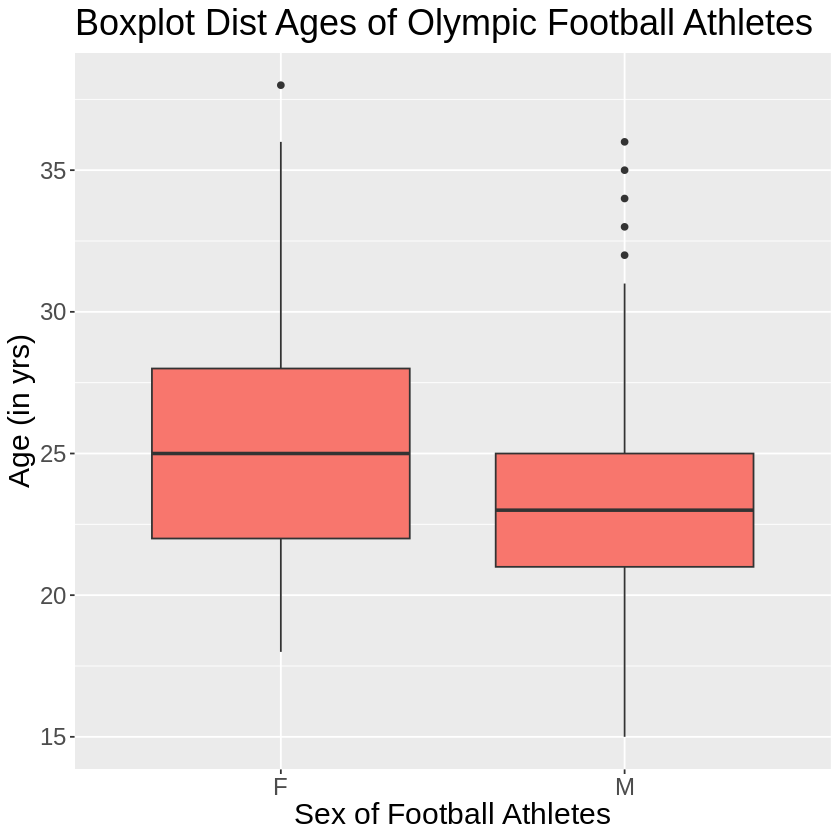

In [9]:
boxplot <- football_sample %>% 
            ggplot() +
            geom_boxplot(aes(Sex , Age, fill = "Blue")) +
            theme(text = element_text(size = 18)) +
            ggtitle("Boxplot Dist Ages of Olympic Football Athletes") + 
            xlab("Sex of Football Athletes") + 
            ylab("Age (in yrs)") + 
            guides(fill = FALSE)
boxplot

<h5>Observed Statistics</h5>

In [10]:
football_sample_men <- football_sample %>%
                        filter(Sex == "M")
summary(football_sample_men)
sd_men_obs <- sd(football_sample_men$Age) #observed sample stnd deviation for male athletes
sd_men_obs

     Sex                 Age           Medal          
 Length:507         Min.   :15.00   Length:507        
 Class :character   1st Qu.:21.00   Class :character  
 Mode  :character   Median :23.00   Mode  :character  
                    Mean   :23.17                     
                    3rd Qu.:25.00                     
                    Max.   :36.00                     

[1] 3.20719

In [11]:
football_sample_female <- football_sample %>%
                        filter(Sex == "F")
summary(football_sample_female)
sd_female_obs <- sd(football_sample_female$Age) #observed sample stnd deviation for female athletes
sd_female_obs

     Sex                 Age           Medal          
 Length:93          Min.   :18.00   Length:93         
 Class :character   1st Qu.:22.00   Class :character  
 Mode  :character   Median :25.00   Mode  :character  
                    Mean   :24.97                     
                    3rd Qu.:28.00                     
                    Max.   :38.00                     

[1] 4.319953

In [12]:
observed_stat <- data.frame(
    male_sd = sd_men_obs,
    female_sd = sd_female_obs,
    male_mean = mean(football_sample_men$Age),
    female_mean = mean(football_sample_female$Age),
    obs_mean_difference = mean(football_sample_men$Age)-mean(football_sample_female$Age),
    obs_sd_difference = sd_men_obs-sd_female_obs)
observed_stat

male_sd,female_sd,male_mean,female_mean,obs_mean_difference,obs_sd_difference
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.20719,4.319953,23.16765,24.96774,-1.800089,-1.112763


The plots above do address our question as there seem to be some difference in the sample means of these gender as well as there are some evident differences in the spread.

<H2>💡 Methods: Plan </H2>

The "good thing" about this report is the sample population we are using for the argument, `olympic football athletes` is sampled at random and unbiased fashion. Separating sports competition by gender is often regarded as one of the most controversial topics in the history of sports, especially with the recent rise and push for gender equality. Therefore by using this report, it directly reflects those competing at the highest levels, hence, those who are directly impacted by decision of gender affect on sports. As shown above, we were able to calculate the point estimate mean age, and produce graphs that help us visualize those point estimates that help us draw a relationship between the age and the olympic athletes in both genders.

(This is done from the single sample we took from population, as we're assuming we don't have access to the population)

We see some observed negative differences in Male and Female Athlete's mean & standard deviation of age. However, we know nothing about the reliability of these results. To address this we will be conducting a hypothesis test and calculating a two-tailed 95% confidence interval. Initially, we'll be using bootstrapping method as it would gain a better approximation accuracy than asymptotic distribution. However, if we have enough time, we'll explore asymptotic method to validate our results as it highly depends on CLT and our dataset does satisy CLT conditions due to large sample size.

For both genders, the hypothesis tests will be:

$$H_{0} : \mu_{Age of Male Football Olymic Athletes} - \mu_{Age of Female Football Olymic Athletes} = 0$$
$$H_{A} : \mu_{Age of Male Football Olymic Athletes} - \mu_{Age of Female Football Olymic Athletes} \not= 0$$

Additionally, for the the scale parameter hypothesis test will be:

$$H_{0} : \sigma_{Age of Male Football Olymic Athletes} - \sigma_{Age of Female Football Olymic Athletes} = 0$$
$$H_{A} : \sigma_{Age of Male Football Olymic Athletes} - \sigma_{Age of Female Football Olymic Athletes} \not= 0$$

We expect the p-value from the hypothesis test to be less than 0.05 ($ p < 0.05$), as this would indicate that the deviations from the null hypothesis to be statistically significant, allowing us to reject the null hypothesis. As for the confidence interval, the sample we are using is really large ($n = 600 > 50$). Therefore a 95% confidence interval should provide a fairly low margin of error, allowing us to prove that the estimates are reliable. 

This would help us conclude that age does in fact play a role in the performances of athletes for both genders. These findings could be used to argue that sport competitions should or shouldn’t be separated by both gender and age. Leading to some further questions like, Is there a relationship between the Weight Class and Gender for Olympic Football Athletes? Does Gender affect the likeliness of Olympic Football Athletes winning a medal?

<h4>Computing estimates of Parameter</h4>
<hr/>

We'll be estimating these parameters of`football_sample` on 95% CI: 

Mean Age for Men Athletes; Mean Age for Female Athletes

Std Deviation of Age for Men Athletes; Std Deviation of Age for Female Athletes 


In [13]:
set.seed(4321)
# Bootstrapping for estimating Mean Age of Male Football Athletes - Mean Age of Female Football Athletes
football_mean_diff <- football_sample %>%
                    specify(formula=Age ~ Sex)%>%
                    hypothesize(null = "independence") %>%
                    generate(reps=1000, type = "permute")%>%
                    calculate(stat="diff in means", order = c('M','F'))

head(football_mean_diff)

replicate,stat
<int>,<dbl>
1,-0.47668130
2,0.22319781
3,-0.08220398
4,-0.28580518
5,0.38862378
6,-0.20945473


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


lower_ci,upper_ci
<dbl>,<dbl>
-0.7696761,0.7449259


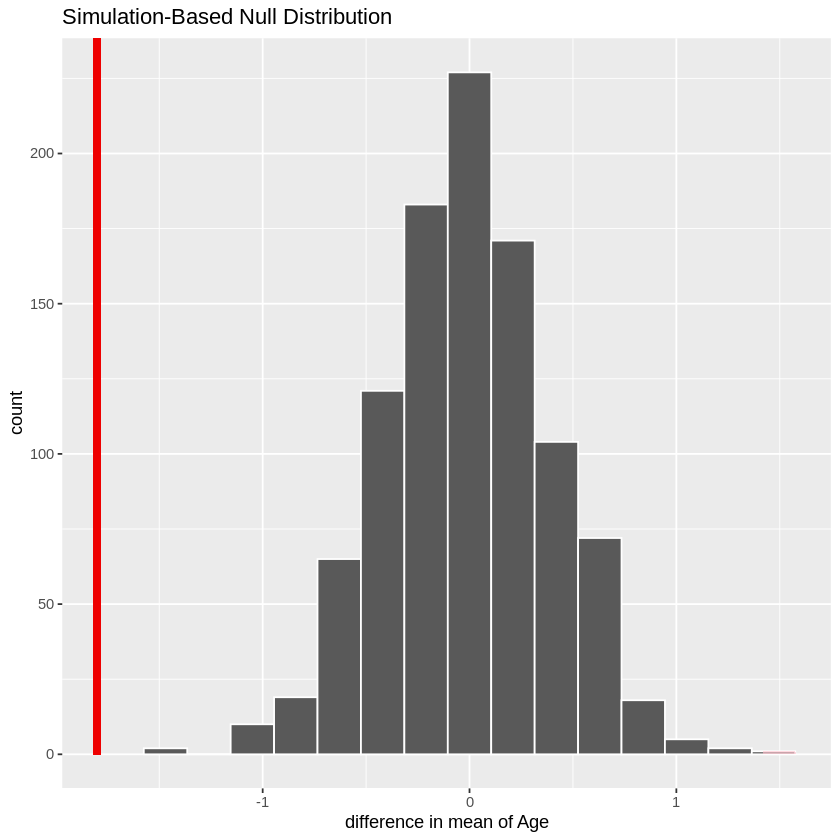

In [14]:
p_value_mean = football_mean_diff %>% get_p_value(obs_stat = observed_stat$obs_mean_difference, direction = "both")

shade_mean_diff <- football_mean_diff %>%
                        visualize() +
                        shade_p_value(observed_stat$obs_mean_difference, direction = "both")+
                        labs(x = "difference in mean of Age")
shade_mean_diff

mean_diff_ci <- football_mean_diff%>%
get_confidence_interval(level = 0.95)

mean_diff_ci

In [15]:
p_value_mean$p_value[1]

[1] 0

As this p_values is less than 0.05 therefore, indicating it is significant enough to reject the null hypothesis. 

In [19]:
set.seed(1234)
# Bootstrapping for Estimating Standard Deviation  
# TUTORIAL 04 : USE SUMMARISE
football_male_resample_sd <- football_sample %>%
                    filter(Sex == "M")%>%
                    specify(response=Age)%>%
                    generate(reps=1000, type = "bootstrap")%>%
                    calculate(stat="sd")
football_male_ci_sd<- football_male_resample_sd %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

head(football_male_resample_sd)
football_male_ci_sd

replicate,stat
<int>,<dbl>
1,3.214345
2,3.242198
3,3.036005
4,3.397669
5,3.217852
6,3.120085


lower_ci,upper_ci
<dbl>,<dbl>
2.967496,3.425847


In [20]:
set.seed(101)
football_female_resample_sd <- football_sample %>%
                    filter(Sex == "F")%>%
                    specify(response=Age)%>%
                    generate(reps=1000, type = "bootstrap")%>%
                    calculate(stat="sd")
football_female_ci_sd<- football_female_resample_sd %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

head(football_female_resample_sd)
football_female_ci_sd

replicate,stat
<int>,<dbl>
1,4.223036
2,3.930497
3,4.024324
4,4.026153
5,4.528260
6,3.831112


lower_ci,upper_ci
<dbl>,<dbl>
3.683722,4.926247


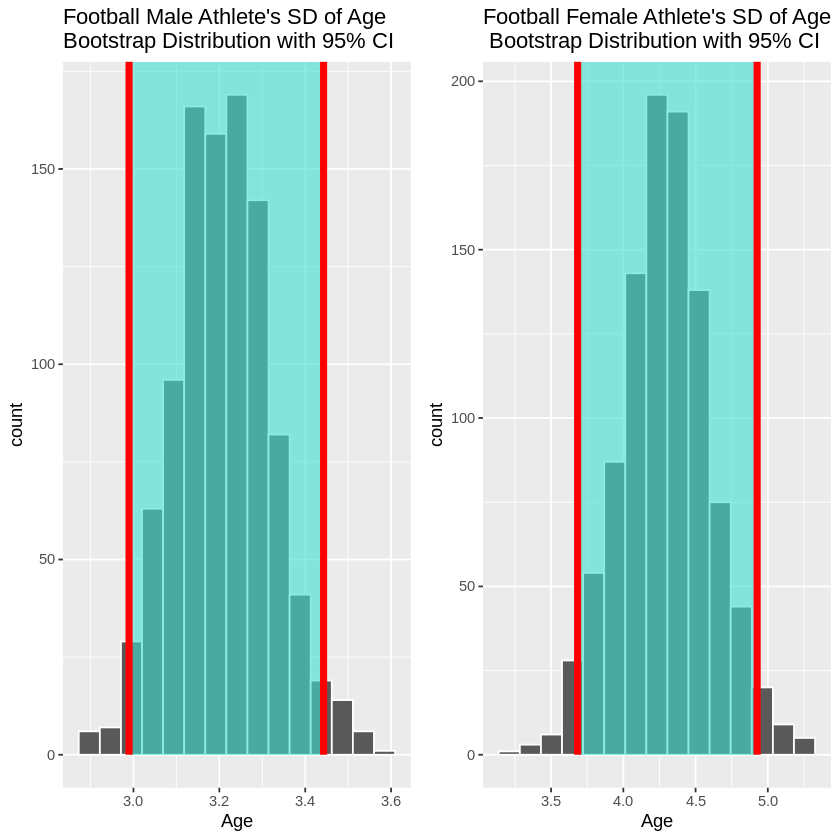

In [18]:
male_medal_vis_sd<-football_male_resample_sd%>%
                    visualize()+
                    ggtitle("Football Male Athlete's SD of Age \nBootstrap Distribution with 95% CI")+
                    labs(x="Age")+
                    shade_ci(endpoints = football_male_ci_sd, color="red")
female_medal_vis_sd<-football_female_resample_sd%>%
                    visualize()+
                    ggtitle("Football Female Athlete's SD of Age \n Bootstrap Distribution with 95% CI")+
                    labs(x="Age")+
                    shade_ci(endpoints = football_female_ci_sd, color="red")
bootstrap_vis_sd <- plot_grid(male_medal_vis_sd, female_medal_vis_sd, rel_widths = c(1, 1), rel_heights = c(1, 1))
bootstrap_vis_sd

<H2>References</H2>

- Bongard, V., McDermott, A. Y., Dallal, G. E., & Schaefer, E. J. (2007). Effects of age and gender on physical performance. AGE, 29(2-3), 77–85. https://doi.org/10.1007/s11357-007-9034-z

- Barreira, J., Bueno, B., & Chiminazzo, J. G. C. (2021). Relative age effect and age of peak performance: an analysis of women’s football players in the Olympic games (1996-2016). In Motriz: Revista de Educação Física (Vol. 27). FapUNIFESP (SciELO). https://doi.org/10.1590/s1980-65742021006921